# Bank Credit Exploratory Data Analysis
* Data Source : Provided by institute
* Data Description : Information about loan applications of customers
* Check for the possibility of delayed repayment/Default

## 1.Data Sourcing 

### 1.1 Importing necessary libraries 

In [1]:
# importing necessary libraries

import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
# setting up pandas to view large files
pd.set_option('display.max_rows', 125)
pd.set_option('display.max_columns', 125)

### 1.2 Reading the 'application_data.csv' dataset

In [3]:
# importing csv file "application_data.csv"

AD = pd.read_csv('application_data.csv')

### 1.3 Checking the shape and other statistical attributes of the data

In [4]:
AD_shape = AD.shape
AD_shape

(307511, 122)

In [5]:
# Default parameter for 'info()' doesn't display the column due to the large size, trying 'verbose = True'
AD.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [6]:
AD.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
# Statistical summary of the data.

print(100*AD.isnull().mean())
AD.describe(include = 'all')

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### 1.4 Inspecting  and Removing null values

#### 1.4.1 Inspecting null value as percentage of each column.

In [8]:
AD.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

#### 1.4.2 Removing null values above the threshold of 32% nulls in each attribute for this analysis

* We will use a '32%' threshold and drop all the columns beyond it. We are using '32%' to keep the column 'OCCUPATION_TYPE' a part of our analysis. 
* OCCUPATION_TYPE" may provide some useful insights further into our analysis, despite the high nulls percentage.
* Most other columns beyond this threshold have a lot of NaN values, and don't seem to be relevent to our analysis.We have to clean this data before proceeding with the analysis.

In [9]:
# Removing attributes above the 32% threshold for null values

AD = AD.loc[:,AD.isnull().mean() <= .32]
print(100*AD.isnull().mean())
print(AD.shape)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

## 2. Data Cleaning and Manipulation

### 2.1. Removing columns not useful for our analysis

* The following columns don't seem to be useful to our analysis, having a clean and concise dataframe would help later while plotting so we will drop these:

 1. NAME_TYPE_SUITE : Who was accompanying client when he was applying for the loan
 2. WEEKDAY_APPR_PROCESS_START : On which day of the week did the client apply for the loan
 3. HOUR_APPR_PROCESS_START : Approximately at what hour did the client apply for the loan
 4. REG_REGION_NOT_LIVE_REGION : Flag if client's permanent address does not match contact address
 5. REG_REGION_NOT_WORK_REGION : Flag if client's permanent address does not match work address
 6. LIVE_REGION_NOT_WORK_REGION : Flag if client's contact address does not match work address
 7. REG_CITY_NOT_LIVE_CITY : Flag if client's permanent address does not match contact address
 8. REG_CITY_NOT_WORK_CITY : Flag if client's permanent address does not match work address
 9. LIVE_CITY_NOT_WORK_CITY : Flag if client's contact address does not match work address
 10. EXT_SOURCE_3 : Normalized score from external data source

In [10]:
# Removing aforementioned 11 columns

AD.drop(['NAME_TYPE_SUITE',
         'WEEKDAY_APPR_PROCESS_START',
         'HOUR_APPR_PROCESS_START',
         'REG_REGION_NOT_LIVE_REGION',
         'REG_REGION_NOT_WORK_REGION',
         'LIVE_REGION_NOT_WORK_REGION',
         'REG_CITY_NOT_LIVE_CITY',
         'REG_CITY_NOT_WORK_CITY',
         'LIVE_CITY_NOT_WORK_CITY',
         'EXT_SOURCE_3'], axis = 1, inplace = True)

print(AD.shape)

(307511, 63)


In [11]:
# Checking datatypes to convert in usable datatype
AD.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL               

#### 2.1.1 Aggregating similar attributes into one

* These are just flags we don't know which documents have more weight
 * There are 20 columns for 'FLAG_DOCUMENT_X', as these are binary flags we can aggregate them into one varible. 
 * A new column 'FLAG_DOCUMENT_TOTAL' varaible will used to capture the aggregated values for these 20 columns
 * This will significantly reduce the columns we have to work with.

In [12]:
# Creating a list with the attribute 'FLAG_DOCUMENT' 
flag_docs = []

for i in AD.columns:
    if i.startswith('FLAG_DOCUMENT'):
        flag_docs.append(i)
flag_docs

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [13]:
# Aggregating all the columns with "FLAG_DOCUMENT_X" to one column 'FLAG_DOCUMENT_TOTAL'

AD['FLAG_DOCUMENT_TOTAL'] = AD[flag_docs].agg('sum', axis = 1)
AD.FLAG_DOCUMENT_TOTAL.value_counts(dropna = False)
print(AD.shape)

(307511, 64)


In [14]:
# Removing aforementioned 19 columns which are already aggregated.

AD.drop(flag_docs, axis = 1, inplace = True)
print(AD.shape)

(307511, 44)


#### 2.1.2 Dropping Rows with null values

* The following Columns have a few rows with missing values, these rows can be dropped without much impact to our analysis as our dataset is comparatively huge:

 1. EXT_SOURCE_2
 2. AMT_ANNUITY : 12
 3. AMT_GOODS_PRICE : 278 
 4. CNT_FAM_MEMBERS: 2
 5. OBS_30_CNT_SOCIAL_CIRCLE : 1021
 6. DEF_30_CNT_SOCIAL_CIRCLE : 1021
 7. OBS_60_CNT_SOCIAL_CIRCLE : 1021
 8. DEF_60_CNT_SOCIAL_CIRCLE : 1021 

In [15]:
# Removing null values step by step to ensure all null values from these columns are removed

ad_8 = AD[~AD.EXT_SOURCE_2.isnull()]
ad_7 = ad_8[~AD.AMT_ANNUITY.isnull()]
ad_6 = ad_7[~ad_7.AMT_GOODS_PRICE.isnull()]
ad_5 = ad_6[~ad_6.CNT_FAM_MEMBERS.isnull()]
ad_4 = ad_5[~ad_5.OBS_30_CNT_SOCIAL_CIRCLE.isnull()]
ad_3 = ad_4[~ad_4.DEF_30_CNT_SOCIAL_CIRCLE.isnull()]
ad_2 = ad_3[~ad_4.OBS_60_CNT_SOCIAL_CIRCLE.isnull()]
ad_1 = ad_2[~ad_4.DEF_60_CNT_SOCIAL_CIRCLE.isnull()]
ad   = ad_1[~ad_1.DAYS_LAST_PHONE_CHANGE.isnull()]

In [16]:
print(ad.shape)
ad.isnull().sum()

(305545, 44)


SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                95763
C

### 2.2 Replacing NaN's and other fraudulent values

#### 2.2.1 Replacing Categorical Variables

In [17]:
#Data cleaning 5.Replacing Catagorical Variable "OCCUPATION_TYPE" NaN values with "Unknown"

ad.OCCUPATION_TYPE.fillna('Unknown', inplace=True)
ad.OCCUPATION_TYPE.value_counts(dropna = False)

Unknown                  95763
Laborers                 54892
Sales staff              31896
Core staff               27367
Managers                 21186
Drivers                  18525
High skill tech staff    11305
Accountants               9731
Medicine staff            8482
Security staff            6685
Cooking staff             5908
Cleaning staff            4622
Private service staff     2640
Low-skill Laborers        2084
Waiters/barmen staff      1341
Secretaries               1297
Realty agents              745
HR staff                   562
IT staff                   514
Name: OCCUPATION_TYPE, dtype: int64

In [18]:
ad.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                    0
C

#### 2.2.2 Replacing the NaN values with respective medians:
* The following numerical columns don't seem to be useful for our anlysis, but we cannot risk dropping these, replacing the NaN's with repective mendians(Replacing with quantile medians might give us a better representation):

 1. AMT_REQ_CREDIT_BUREAU_HOUR
 2. AMT_REQ_CREDIT_BUREAU_DAY
 3. AMT_REQ_CREDIT_BUREAU_WEEK
 4. AMT_REQ_CREDIT_BUREAU_MON
 5. AMT_REQ_CREDIT_BUREAU_QRT 
 6. AMT_REQ_CREDIT_BUREAU_YEAR

In [19]:
# Filling in Numerical values........................................................................

ad.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(ad.AMT_REQ_CREDIT_BUREAU_HOUR.median(),inplace = True)
ad.AMT_REQ_CREDIT_BUREAU_DAY.fillna(ad.AMT_REQ_CREDIT_BUREAU_DAY.median(), inplace = True)
ad.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(ad.AMT_REQ_CREDIT_BUREAU_WEEK.median(),inplace = True)
ad.AMT_REQ_CREDIT_BUREAU_MON.fillna(ad.AMT_REQ_CREDIT_BUREAU_MON.median(),inplace = True)
ad.AMT_REQ_CREDIT_BUREAU_QRT.fillna(ad.AMT_REQ_CREDIT_BUREAU_QRT.median(),inplace = True)
ad.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(ad.AMT_REQ_CREDIT_BUREAU_YEAR.median(),inplace = True)

In [20]:
ad_shape = ad.shape

r = AD_shape[0] - ad_shape[0]
r_per = round(100*r/AD_shape[0],2)
r_100 = round(100 - r_per,2)

c = AD_shape[1] - ad_shape[1]
c_per = round(100*c/AD_shape[1],2) 
c_100 = round(100 - c_per,2)


print('Total Retained : {}({}%) rows and {}({}%) columns  will be used for further analysis.'.format(ad_shape[0],r_100,ad_shape[1],c_100))
print('Total Removed  : {}({}%) rows and {}({}%) columns  have been removed from the original due to quality issues.'.format(r,r_per,c,c_per))
#ad.isnull().sum()

Total Retained : 305545(99.36%) rows and 44(36.07%) columns  will be used for further analysis.
Total Removed  : 1966(0.64%) rows and 78(63.93%) columns  have been removed from the original due to quality issues.


* The total percentage columns  of the Dataset we are getting rid of seems too large, but as we saw previously most of the values were NaN's.
* These columns would not have been useful for our analysis, infact they could have skewed our anaysis undesirably.
* It is better to perform analysis with fewer, but good quality data to be confident of our results.

## 3. Converting Datatypes

In [21]:
print('data_type(int)  : ',ad.select_dtypes('int64').shape[1])
print('data_type(float)  : ',ad.select_dtypes('float64').shape[1])
print('data_type(object) : ',ad.select_dtypes('object').shape[1])
print('total_data_types   : ',ad.select_dtypes('int64').shape[1]+ad.select_dtypes('float64').shape[1]+ad.select_dtypes('object').shape[1])

data_type(int)  :  15
data_type(float)  :  19
data_type(object) :  10
total_data_types   :  44


In [22]:
ad.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE      2
CODE_GENDER             3
FLAG_OWN_CAR            2
FLAG_OWN_REALTY         2
NAME_INCOME_TYPE        8
NAME_EDUCATION_TYPE     5
NAME_FAMILY_STATUS      5
NAME_HOUSING_TYPE       6
OCCUPATION_TYPE        19
ORGANIZATION_TYPE      58
dtype: int64

* As we can see above most of the data is either int or float which is good.
* The following columns with object data_types can be useful for our analysis if they were numerical types (0,1) instead of (N,Y).
 1. FLAG_OWN_CAR
 2. FLAG_OWN_REALTY 

### 3.1 Converting Categorical attributes

In [23]:
#Converting the aforementioned categorical object type to numeric type.

ad.FLAG_OWN_CAR.replace('Y',1, inplace = True)
ad.FLAG_OWN_CAR.replace('N',0, inplace = True)

ad.FLAG_OWN_REALTY.replace('Y',1, inplace = True)
ad.FLAG_OWN_REALTY.replace('N',0, inplace = True)

In [24]:
ad.select_dtypes('float').nunique()

AMT_INCOME_TOTAL                2541
AMT_CREDIT                      5603
AMT_ANNUITY                    13669
AMT_GOODS_PRICE                 1002
REGION_POPULATION_RELATIVE        81
DAYS_REGISTRATION              15682
CNT_FAM_MEMBERS                   17
EXT_SOURCE_2                  119656
OBS_30_CNT_SOCIAL_CIRCLE          33
DEF_30_CNT_SOCIAL_CIRCLE          10
OBS_60_CNT_SOCIAL_CIRCLE          33
DEF_60_CNT_SOCIAL_CIRCLE           9
DAYS_LAST_PHONE_CHANGE          3770
AMT_REQ_CREDIT_BUREAU_HOUR         5
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
dtype: int64

In [25]:
ad.DAYS_REGISTRATION.value_counts()

-1.0        113
-7.0         97
-6.0         96
-2.0         92
-4.0         91
           ... 
-16240.0      1
-16025.0      1
-14914.0      1
-15259.0      1
-15422.0      1
Name: DAYS_REGISTRATION, Length: 15682, dtype: int64

* The following columns would make more sense as 'int' datatypes:
 1. DAYS_REGISTRATION
 2. CNT_FAM_MEMBERS
 3. OBS_30_CNT_SOCIAL_CIRCLE
 4. DEF_30_CNT_SOCIAL_CIRCLE
 5. OBS_60_CNT_SOCIAL_CIRCLE
 6. DEF_60_CNT_SOCIAL_CIRCLE

### 3.2 Converting Numeric attributes

#### 3.2.1 Converting float type to int as the data represented by the attributes make more sense as int

In [26]:
# Converting the following into 'int' datatype

#ad.AMT_INCOME_TOTAL = ad.AMT_INCOME_TOTAL.astype(int, errors = 'ignore')
ad.DAYS_REGISTRATION = ad.DAYS_REGISTRATION.astype(int)
ad.CNT_FAM_MEMBERS = ad.CNT_FAM_MEMBERS.astype(int)
ad.OBS_30_CNT_SOCIAL_CIRCLE = ad.OBS_30_CNT_SOCIAL_CIRCLE.astype(int, errors = 'ignore')
ad.DEF_30_CNT_SOCIAL_CIRCLE = ad.DEF_30_CNT_SOCIAL_CIRCLE.astype(int, errors = 'ignore')
ad.OBS_60_CNT_SOCIAL_CIRCLE = ad.OBS_60_CNT_SOCIAL_CIRCLE.astype(int, errors = 'ignore')
ad.DEF_60_CNT_SOCIAL_CIRCLE = ad.DEF_60_CNT_SOCIAL_CIRCLE.astype(int, errors = 'ignore')

In [27]:
ad.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                     int64
FLAG_OWN_REALTY                  int64
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION                int64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE                       int64
FLAG_EMAIL               

#### 3.2.2 Converting negetive values to positives

In [28]:
ad.describe()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DOCUMENT_TOTAL
count,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,3.055450e+05,3.055450e+05,305545.000000,3.055450e+05,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.0,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,3.055450e+05,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000
mean,278177.370574,0.080892,0.340490,0.693463,0.417091,1.687142e+05,6.000775e+05,27144.615371,5.389454e+05,0.020847,-16038.626265,63821.701589,-4985.045306,-2994.773323,1.0,0.819869,0.199539,0.998148,0.281157,0.056797,2.152986,2.053144,2.032143,5.142614e-01,1.422877,0.143458,1.405937,0.100093,-963.776884,0.005538,0.006061,0.029776,0.231616,0.230117,1.780644,0.933136
std,102783.965089,0.272669,0.473875,0.461056,0.722237,2.375879e+05,4.027055e+05,14481.421690,3.695827e+05,0.013810,4362.965823,141282.081167,3522.214696,1509.239114,0.0,0.384297,0.399654,0.043000,0.449564,0.231454,0.910665,0.508879,0.502616,1.911042e-01,2.401671,0.446752,2.380499,0.362380,827.163502,0.078036,0.102988,0.190644,0.856922,0.745190,1.766091,0.340957
min,100002.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.173617e-08,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189149.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16573.500000,2.385000e+05,0.010006,-19681.000000,-2761.000000,-7477.000000,-4299.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.922228e-01,0.000000,0.000000,0.000000,0.000000,-1571.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,278201.000000,0.000000,0.000000,1.000000,0.000000,1.485000e+05,5.175000e+05,24939.000000,4.500000e+05,0.018850,-15752.000000,-1214.000000,-4503.000000,-3255.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,5.658218e-01,0.000000,0.000000,0.000000,0.000000,-758.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,367135.000000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34636.500000,6.795000e+05,0.028663,-12415.000000,-289.000000,-2009.000000,-1721.000000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,6.635585e-01,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
max,456255.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000,8.549997e-01,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,4.000000


In [29]:
# Dividing by 365 gives us the 'AGE' from the 'DAYS_BIRTH' column, which will be useful later
ad.DAYS_BIRTH = abs(ad.DAYS_BIRTH//365.25)

In [30]:
# Diving by 7 gives us "WEEKS_EMPLOYED" from "DAYS_EMPLOYED", weeks seems appropriate for this column
ad.DAYS_EMPLOYED = abs((ad.DAYS_EMPLOYED)//7)

In [31]:
# Taking the absolute for "DAYS_REGISTRATION"
ad.DAYS_REGISTRATION = abs(ad.DAYS_REGISTRATION)

In [32]:
# Taking the absolute for "DAYS_ID_PUBLISH"
ad.DAYS_ID_PUBLISH = abs(ad.DAYS_ID_PUBLISH)

In [33]:
# Taking the absolute for "DAYS_LAST_PHONE_CHANGE"
ad.DAYS_LAST_PHONE_CHANGE = abs(ad.DAYS_LAST_PHONE_CHANGE)

#### 3.2.3 Changing  name of the columns to better represent the data after the modifications made.

* Convering from "DAYS_BIRTH" to "AGE" is not necessary but it would help us in binning our clients into approprite age buckets and be useful to our analysis.
* Convering from "DAYS_EMPLOYED" to "WEEKS_EMPLOYED" would help reduce the spread of the data to a much narrower spectrum and will help us later.

In [34]:
ad.rename(columns = {'DAYS_BIRTH':'AGE', 'DAYS_EMPLOYED':'WEEKS_EMPLOYED'}, inplace = True)

In [35]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305545 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   305545 non-null  int64  
 1   TARGET                       305545 non-null  int64  
 2   NAME_CONTRACT_TYPE           305545 non-null  object 
 3   CODE_GENDER                  305545 non-null  object 
 4   FLAG_OWN_CAR                 305545 non-null  int64  
 5   FLAG_OWN_REALTY              305545 non-null  int64  
 6   CNT_CHILDREN                 305545 non-null  int64  
 7   AMT_INCOME_TOTAL             305545 non-null  float64
 8   AMT_CREDIT                   305545 non-null  float64
 9   AMT_ANNUITY                  305545 non-null  float64
 10  AMT_GOODS_PRICE              305545 non-null  float64
 11  NAME_INCOME_TYPE             305545 non-null  object 
 12  NAME_EDUCATION_TYPE          305545 non-null  object 
 13 

### 3.3 Checking for Outliers

In [36]:
ad.describe()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,AGE,WEEKS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DOCUMENT_TOTAL
count,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,3.055450e+05,3.055450e+05,305545.000000,3.055450e+05,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.0,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,3.055450e+05,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000,305545.000000
mean,278177.370574,0.080892,0.340490,0.693463,0.417091,1.687142e+05,6.000775e+05,27144.615371,5.389454e+05,0.020847,44.409033,9676.316503,4985.045306,2994.773323,1.0,0.819869,0.199539,0.998148,0.281157,0.056797,2.152986,2.053144,2.032143,5.142614e-01,1.422877,0.143458,1.405937,0.100093,963.776884,0.005538,0.006061,0.029776,0.231616,0.230117,1.780644,0.933136
std,102783.965089,0.272669,0.473875,0.461056,0.722237,2.375879e+05,4.027055e+05,14481.421690,3.695827e+05,0.013810,11.943056,19920.964208,3522.214696,1509.239114,0.0,0.384297,0.399654,0.043000,0.449564,0.231454,0.910665,0.508879,0.502616,1.911042e-01,2.401671,0.446752,2.380499,0.362380,827.163502,0.078036,0.102988,0.190644,0.856922,0.745190,1.766091,0.340957
min,100002.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,21.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.173617e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189149.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16573.500000,2.385000e+05,0.010006,34.000000,134.000000,2009.000000,1721.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.922228e-01,0.000000,0.000000,0.000000,0.000000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,278201.000000,0.000000,0.000000,1.000000,0.000000,1.485000e+05,5.175000e+05,24939.000000,4.500000e+05,0.018850,44.000000,318.000000,4503.000000,3255.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,5.658218e-01,0.000000,0.000000,0.000000,0.000000,758.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,367135.000000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34636.500000,6.795000e+05,0.028663,54.000000,816.000000,7477.000000,4299.000000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,6.635585e-01,2.000000,0.000000,2.000000,0.000000,1571.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
max,456255.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,70.000000,52177.000000,24672.000000,7197.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,3.000000,8.549997e-01,348.000000,34.000000,344.000000,24.000000,4292.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,4.000000


1. Checking for Outliers in 'AMT_INCOME_TOTAL'

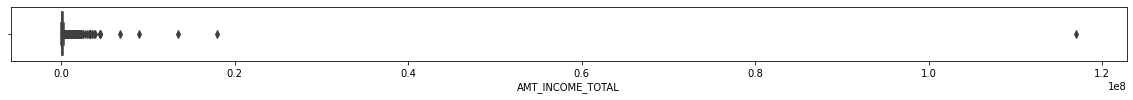

In [37]:
# Checking for Outliers in 'AMT_INCOME_TOTAL'
plt.figure(figsize = (20,1))
sns.boxplot(ad.AMT_INCOME_TOTAL)
plt.show()

* As we can see above there is atleast one significant outlier for "AMT_INCOME_TOTAL" which is a very important field to focus on.
* It would be better if these outliers are not taken into account during our analysis as it way skew the data towards the higher side. 

In [38]:
# Using data for upto 99 quantile of the column
ad = ad[ad.AMT_INCOME_TOTAL < ad.AMT_INCOME_TOTAL.quantile(0.99)]

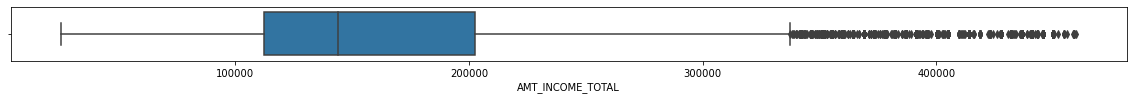

In [39]:
# Plotting again to check for Outliers in 'AMT_INCOME_TOTAL'
plt.figure(figsize = (20,1))
sns.boxplot(ad.AMT_INCOME_TOTAL)
plt.show()

2. Checking for Outliers in 'AMT_ANNUITY'

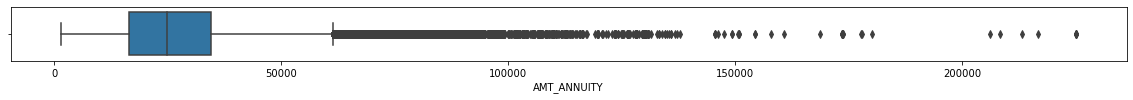

In [40]:
# Checking for Outliers in "AMT_ANNUITY"
plt.figure(figsize = (20,1))
sns.boxplot(ad.AMT_ANNUITY)
plt.show()

* Outliers are present in "AMT_ANNUITY" it will be better to not take these into account, as they will skew the analysis
* Removing those and plotting again give a better representation of the data. 

In [41]:
# Using data for upto 99 quantile of the column
ad = ad[ad.AMT_ANNUITY < ad.AMT_ANNUITY.quantile(0.99)]

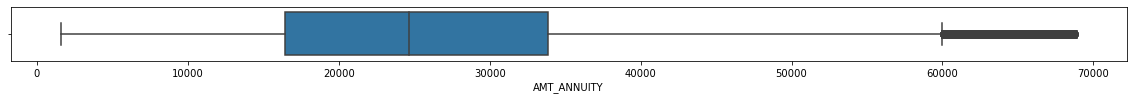

In [42]:
# Plotting again to check for Outliers in 'AMT_ANNUITY'
plt.figure(figsize = (20,1))
sns.boxplot(ad.AMT_ANNUITY)
plt.show()

3.Checking for Outliers in 'WEEKS_EMPLOYED'

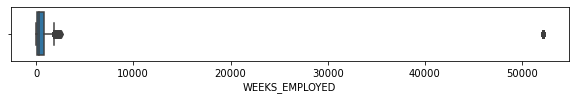

In [43]:
# Checking for Outliers in "WEEKS_EMPLOYED"
plt.figure(figsize = (10,1))
sns.boxplot(ad.WEEKS_EMPLOYED)
plt.show()

* Atleast one signigicant Outlier present
* Removing those and plotting again.....

In [44]:
# Using data for upto 99 quantile of the column
ad = ad[ad.WEEKS_EMPLOYED < ad.WEEKS_EMPLOYED.quantile(0.99)]

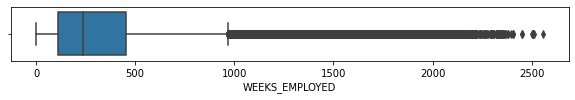

In [45]:
# Plotting again to check for Outliers in 'WEEKS_EMPLOYED'
plt.figure(figsize = (10,1))
sns.boxplot(ad.WEEKS_EMPLOYED)
plt.show()

In [46]:
# Using data for upto 75 quantile of the column
ad_days_75 = ad[ad.WEEKS_EMPLOYED < ad.WEEKS_EMPLOYED.quantile(0.75)]

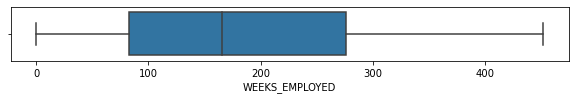

In [47]:
# Plotting out and and checking for Outliers in 'WEEKS_EMPLOYED'
plt.figure(figsize = (10,1))
sns.boxplot(ad_days_75.WEEKS_EMPLOYED)
plt.show()

4. 3.Checking for Outliers in 'EXT_SOURCE_2'

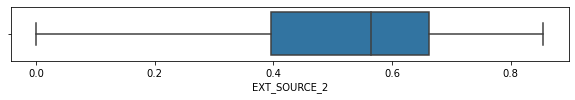

In [48]:
# Checking for Outliers in "EXT_SOURCE_2"
plt.figure(figsize = (10,1))
sns.boxplot(ad.EXT_SOURCE_2)
plt.show()

In [49]:
ad.TARGET.value_counts(normalize = True)*100

0    91.236928
1     8.763072
Name: TARGET, dtype: float64

## 4. Checking Data Imbalance and Binning

In [50]:
ad.nunique()

SK_ID_CURR                     244994
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2040
AMT_CREDIT                       4879
AMT_ANNUITY                     11914
AMT_GOODS_PRICE                   857
NAME_INCOME_TYPE                    7
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  5
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
AGE                                49
WEEKS_EMPLOYED                   2222
DAYS_REGISTRATION               14383
DAYS_ID_PUBLISH                  6134
FLAG_MOBIL                          1
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
OCCUPATION_T

* For the following columns we are checking the data imbalance and proportions for each data point, this gives us information about how the numbers are stacked against each other in the columns.
 1. TARGET
 2. NAME_CONTRACT_TYPE
 3. CODE_GENDER
 4. FLAG_OWN_CAR
 5. FLAG_OWN_REALTY
 6. NAME_INCOME_TYPE
 7. NAME_EDUCATION_TYPE
 8. NAME_FAMILY_STATUS
 9. NAME_HOUSING_TYPE
 10. REGION_RATING_CLIENT
 11. REGION_RATING_CLIENT_W_CITY

### 4.1 Checking Data Imbalance

#### 4.1.1 Checking Data Imbalance for 'TARGET'

In [51]:
# Checking for 'TARGET'.....
ad.TARGET.value_counts(normalize = True)*100

0    91.236928
1     8.763072
Name: TARGET, dtype: float64

In [52]:
def plot_pie(x,y,t):
    plt.figure(figsize = (10,5))
    explode = (0.1 , 0) # Helps with the visualisation by exploding the first element in this case from the rest  

    fig1,ax1 = plt.subplots()
    ax1.pie(y, explode = explode, labels = x,autopct = '%1.1f%%',
           shadow = True, startangle = 30)

    plt.title(t, fontsize = 15)
    plt.show()

<Figure size 720x360 with 0 Axes>

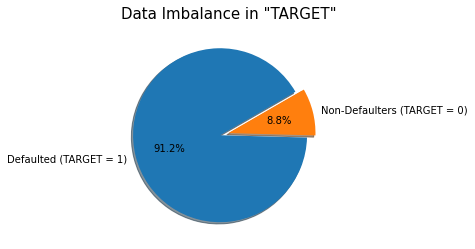

In [53]:
x = ['Defaulted (TARGET = 1)','Non-Defaulters (TARGET = 0)']
y = [(100*ad.TARGET.value_counts(normalize = True)[0]), (100*ad.TARGET.value_counts(normalize = True))[1]]
t = 'Data Imbalance in "TARGET"'
plot_pie(x,y,t)

#### 4.1.2 Checking Data Imbalance for 'NAME_CONTRACT_TYPE'

In [54]:
# Checking for 'NAME_CONTRACT_TYPE'.....
ad.NAME_CONTRACT_TYPE.value_counts(normalize = True)*100

Cash loans         90.096084
Revolving loans     9.903916
Name: NAME_CONTRACT_TYPE, dtype: float64

<Figure size 720x360 with 0 Axes>

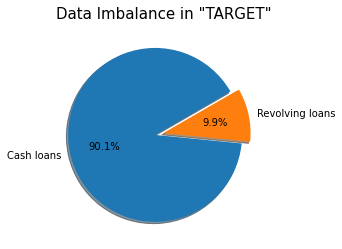

In [55]:
x = ['Cash loans','Revolving loans']
y = [(100*ad.NAME_CONTRACT_TYPE.value_counts(normalize = True)[0]), (100*ad.NAME_CONTRACT_TYPE.value_counts(normalize = True))[1]]
t = 'Data Imbalance in "TARGET"'
plot_pie(x,y,t)

* For the above column 'NAME_CONTRACT_TYPE' proportions of clients with different loan types:
 * Cash loans make up 90.1% of total types of loans
 * Revolving loans make up the remaining 9.9%

#### 4.1.3 Checking Data Imbalance for 'CODE_GENDER'

In [56]:
# Checking for 'CODE_GENDER'.....
ad.CODE_GENDER.value_counts(normalize = True)*100

F      62.607656
M      37.390712
XNA     0.001633
Name: CODE_GENDER, dtype: float64

<Figure size 720x360 with 0 Axes>

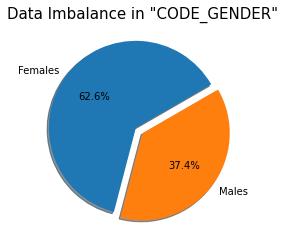

In [57]:
x = ['Females','Males']
y = [(100*ad.CODE_GENDER.value_counts(normalize = True)[0]), (100*ad.CODE_GENDER.value_counts(normalize = True))[1]]
t = 'Data Imbalance in "CODE_GENDER"'
plot_pie(x,y,t)

* For the above column 'CODE_GENDER', proportions based on gender are:
 * Females :~  65.82%
 * Males.... :~ 34.18%
 * XNA ......:~ negligible 

#### 4.1.4 Checking Data Imbalance for 'FLAG_OWN_CAR'

In [58]:
# Checking for 'FLAG_OWN_CAR'.....
ad.FLAG_OWN_CAR.value_counts(normalize = True)*100

0    62.998278
1    37.001722
Name: FLAG_OWN_CAR, dtype: float64

<Figure size 720x360 with 0 Axes>

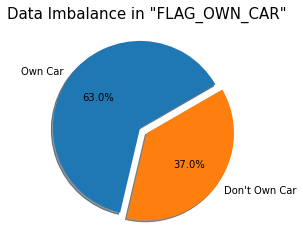

In [59]:
x = ['Own Car',"Don't Own Car"]
y = [(100*ad.FLAG_OWN_CAR.value_counts(normalize = True)[0]), (100*ad.FLAG_OWN_CAR.value_counts(normalize = True))[1]]
t = 'Data Imbalance in "FLAG_OWN_CAR"'
plot_pie(x,y,t)

* For the above column 'FLAG_OWN_CAR' proportions of clients who OWN_CAR vs DONT_OWN_CAR:
  * Assuming {'1' : 'YES' and '0' : 'NO'}
   * Clients who Own Car............ (1) : 37%
   * Clients who Don't Own Car (0) : 63%

#### 4.1.5 Checking Data Imbalance for 'FLAG_OWN_REALTY'

In [60]:
# Checking for 'FLAG_OWN_REALTY'.....
ad.FLAG_OWN_REALTY.value_counts(normalize = True)*100

1    67.796762
0    32.203238
Name: FLAG_OWN_REALTY, dtype: float64

<Figure size 720x360 with 0 Axes>

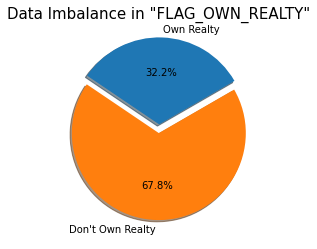

In [61]:
x = ['Own Realty',"Don't Own Realty"]
y = [(100*ad.FLAG_OWN_REALTY.value_counts(normalize = True)[0]), (100*ad.FLAG_OWN_REALTY.value_counts(normalize = True))[1]]
t = 'Data Imbalance in "FLAG_OWN_REALTY"'
plot_pie(x,y,t)

* For the above column 'FLAG_OWN_REALTY' proportions of clients who Own Realty vs those who Don't Own Realty:
  * Assuming {'1' : 'YES' and '0' : 'NO'}
   * Clients who OWN_REALTY............ (1) : 67.8%
   * Clients who DONT_OWN_REALTY (0) : 32.2%

In [62]:
# Checking for 'NAME_INCOME_TYPE'.....
ad.NAME_INCOME_TYPE.value_counts(normalize = True)*100

Working                 63.532576
Commercial associate    27.856192
State servant            8.597353
Student                  0.006939
Pensioner                0.003674
Maternity leave          0.001633
Businessman              0.001633
Name: NAME_INCOME_TYPE, dtype: float64

* For the above column 'NAME_INCOME_TYPE' proportions of clients based on INCOME_TYPE:
  * Working ......................: 51.64%
  * Commercial associate : 23.27%
  * Pensioner ...................: 18.00%
   * Top 3 INCOME_TYPEs make up : 92.92% of the total data
  * State servant ...............: 07.06%
   * Top 4 INCOME_TYPEs make up : 99.98% of the total data

In [63]:
# Checking for 'NAME_EDUCATION_TYPE'.....
ad.NAME_EDUCATION_TYPE.value_counts(normalize = True)*100

Secondary / secondary special    69.491498
Higher education                 25.679404
Incomplete higher                 3.855605
Lower secondary                   0.921655
Academic degree                   0.051838
Name: NAME_EDUCATION_TYPE, dtype: float64

* For the above column 'NAME_EDUCATION_TYPE' proportions of clients based on EDUCATION_TYPE:
  * Secondary / secondary special :~ 71.08%
  * Higher education...................... :~ 24.28%
   * These two EDUCATION_TYPEs make up : 95.37% of the total data

In [64]:
# Checking for 'NAME_FAMILY_STATUS'.....
ad.NAME_FAMILY_STATUS.value_counts(normalize = True)*100

Married                 64.880364
Single / not married    15.622423
Civil marriage          10.442297
Separated                6.370360
Widow                    2.684556
Name: NAME_FAMILY_STATUS, dtype: float64

* For the above column 'NAME_FAMILY_STATUS' proportions of clients based on FAMILY_STATUS:
  * Married............:~ 63.91%
  * Civil marriage  :~ 09.68%
   * These two 'married' and 'civil marriage' make up : 73.59% of the total data
   * Single, not married, separated and widow make up the rest 26.41%

In [65]:
# Checking for 'NAME_HOUSING_TYPE'.....
ad.NAME_HOUSING_TYPE.value_counts(normalize = True)*100

House / apartment      87.374385
With parents            5.852388
Municipal apartment     3.607027
Rented apartment        1.862903
Office apartment        0.904104
Co-op apartment         0.399193
Name: NAME_HOUSING_TYPE, dtype: float64

* For the above column 'NAME_HOUSING_TYPE' proportions of clients based on HOUSING_STATUS:
  * House / apartment..........:~ 88.74%
  * All other types combined :~ 11.25%
   * People living in their own House and apartment makes up 88.75% signifying a majority have their own place to live
   * All other types of accomodation make up the rest 11.25%

In [66]:
# Checking for 'REGION_RATING_CLIENT'.....
ad.REGION_RATING_CLIENT.value_counts(normalize = True)*100

2    73.989159
3    15.617117
1    10.393724
Name: REGION_RATING_CLIENT, dtype: float64

* For the above column 'REGION_RATING_CLIENT' proportions of clients living in REGIONS_CLIENT:
  * Assuming {'1' : 'good', '2' : 'average' and '3': 'below average'}
   * Clients living in good regions................ (1) : 10.43%
   * Clients living in average regions ...........(2) : 73.82%
   * Clients living in below average regions (3) : 15.75%

In [67]:
# Checking for 'REGION_RATING_CLIENT_W_CITY'.....
ad.REGION_RATING_CLIENT_W_CITY.value_counts(normalize = True)*100

2    74.749586
3    14.182796
1    11.067618
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

* For the above column 'REGION_RATING_CLIENT_W_CITY' proportions of clients living in CITY_CLIENT:
  * Assuming {'1' : 'tier 1', '2' : 'tier 2' and '3': 'tier 3'}
   * Clients living in tier 1 cities (1) : 11.07%
   * Clients living in tier 2 cities (2) : 74.63%
   * Clients living in tier 3 cities (3) : 14.29%

### 4.2 Data Binning

#### 4.2.1 Binning 'AMT_INCOME_TOTAL' to 5 bins ['verylow' , 'low' , 'medium' , 'high' , 'veryhigh']

In [68]:
# We are using qcut to use a relatively equally proportioned bins as this an important column 
ad.loc[:,'INCOME_RANGE'] = pd.qcut(ad.AMT_INCOME_TOTAL, q = 5, 
                             labels = ['verylow','low','medium','high','veryhigh'], precision = 0).astype('str')
ad.INCOME_RANGE.value_counts(normalize = True)*100

verylow     29.635011
high        24.565908
low         16.391422
veryhigh    15.383642
medium      14.024017
Name: INCOME_RANGE, dtype: float64

#### 4.2.2 Binning 'AMT_CREDIT' to 5 bins ['verylow' , 'low' , 'medium' , 'high' , 'veryhigh']

In [69]:
# Using cut instead og cut to get equally spaced bins 
ad.loc[:,'CREDIT_RANGE'] = pd.qcut(ad.AMT_CREDIT, q = 5, 
                             labels = ['verylow','low','medium','high','veryhigh'], precision = 0).astype('str')
ad.CREDIT_RANGE.value_counts(normalize = True)*100

high        20.746222
verylow     20.020082
medium      20.013143
low         19.985387
veryhigh    19.235165
Name: CREDIT_RANGE, dtype: float64

#### 4.2.3 Binning 'AMT_ANNUITY' to 5 bins ['verylow' , 'low' , 'medium' , 'high' , 'veryhigh']

In [70]:
# Using cut instead og cut to get equally spaced bins
ad.loc[:,'ANNUITY_RANGE'] = pd.cut(ad.AMT_ANNUITY, bins = 5,
                                   labels = ['verylow','low','medium','high','veryhigh'], precision = 0).astype('str')
ad.ANNUITY_RANGE.value_counts(normalize = True)*100

low         39.815261
medium      26.475342
verylow     20.419684
high        10.272088
veryhigh     3.017625
Name: ANNUITY_RANGE, dtype: float64

#### 4.2.4 Binning 'AMT_GOODS_PRICE' to 5 bins ['verylow' , 'low' , 'medium' , 'high' , 'veryhigh']

In [71]:
# Using cut instead og cut to get equally spaced bins
ad.loc[:,'GOODS_RANGE'] = pd.cut(ad.AMT_GOODS_PRICE, bins = 5,
                                   labels = ['verylow','low','medium','high','veryhigh'], precision = 0).astype('str')
ad.GOODS_RANGE.value_counts(normalize = True)*100

verylow     62.437856
low         28.049258
medium       8.468371
high         0.884103
veryhigh     0.160412
Name: GOODS_RANGE, dtype: float64

#### 4.2.5 Binning 'EXT_SOURCE_2' to 5 bins ['verylow' , 'low' , 'medium' , 'high' , 'veryhigh']

In [72]:
# Using cut instead og cut to get equally spaced bins
ad.loc[:,'EXT_RANGE'] = pd.cut(ad.EXT_SOURCE_2, bins = 5,
                             labels = ['verylow','low','medium','high','veryhigh']).astype('str')
ad.EXT_RANGE.value_counts(normalize = True)*100

high        40.706303
medium      20.267843
veryhigh    19.085774
low         12.652147
verylow      7.287934
Name: EXT_RANGE, dtype: float64

#### 4.2.6 Binning 'AGE' to 5 equally spaced bins

In [73]:
# Using cut instead og cut to get equally spaced bins
ad.loc[:,'AGE_RANGE'] = pd.cut(ad.AGE, bins = np.linspace(20,70,10), precision = 0)
ad.AGE_RANGE.value_counts(normalize = True)*100 

(37.0, 42.0]    20.456419
(26.0, 31.0]    16.208152
(31.0, 37.0]    15.612219
(42.0, 48.0]    14.996694
(48.0, 53.0]    14.974652
(53.0, 59.0]     8.732051
(20.0, 26.0]     4.889507
(59.0, 64.0]     3.523760
(64.0, 70.0]     0.606545
Name: AGE_RANGE, dtype: float64

* For the above column 'TARGET' proportions of clients with payment difficulties vs the contrary are:
 * Clients with payment difficulties (1) :~ 08.09%
 * All other cases............................(0) :~ 91.91%

## 5. Data Analysis

### 5.1 Identifying the 'TARGET' variable to use as an axis for analysing the Defaulters and Non Defaulters 
* We are using 'Defaulters' to tag clients who had difficulties in making payments on time 

In [74]:
# Diffrentiating the data into Defaulters and Non-Defaulters
ad.TARGET.value_counts(normalize = True)*100

0    91.236928
1     8.763072
Name: TARGET, dtype: float64

In [75]:
# Creating dataframe with Clients having difficulty in payment
ad_T_1 = ad[ad.TARGET == 1]
ad_T_1.shape

(21469, 50)

In [76]:
# Creating dataframe with Clients for other cases(i.e. paid on time)
ad_T_0 = ad[ad.TARGET == 0]
ad_T_0.shape

(223525, 50)

#### Univariate Analysis of "TARGET" {1,0} for Categorical Variables

In [77]:
# We will create a function to draw plots and pass in parameters ('column name' and 'xticks rotation') to compare against.
# This will help with Code reuse.

def plot_cate(var,r):
    
    plt.figure(figsize = (20,5))
    
    plt.subplot(1,2,1)
    sns.countplot(var, data = ad_T_0)
    plt.title('Non-Defaulters ({}) Distribution'.format(var), fontsize = 15)
    plt.xlabel(var, fontsize = 15)
    plt.xticks(rotation = r,fontsize = 12)
    plt.ylabel('Number of Non_Defaulters', fontsize = 15)
    
    plt.subplot(1,2,2)
    sns.countplot(var, data = ad_T_1)
    plt.title('Defaulters ({}) Distribution'.format(var), fontsize = 15)
    plt.xlabel(var, fontsize = 15)
    plt.xticks(rotation = r,fontsize = 12)
    plt.ylabel('Number of Defaulters', fontsize = 15)
    
    plt.show()

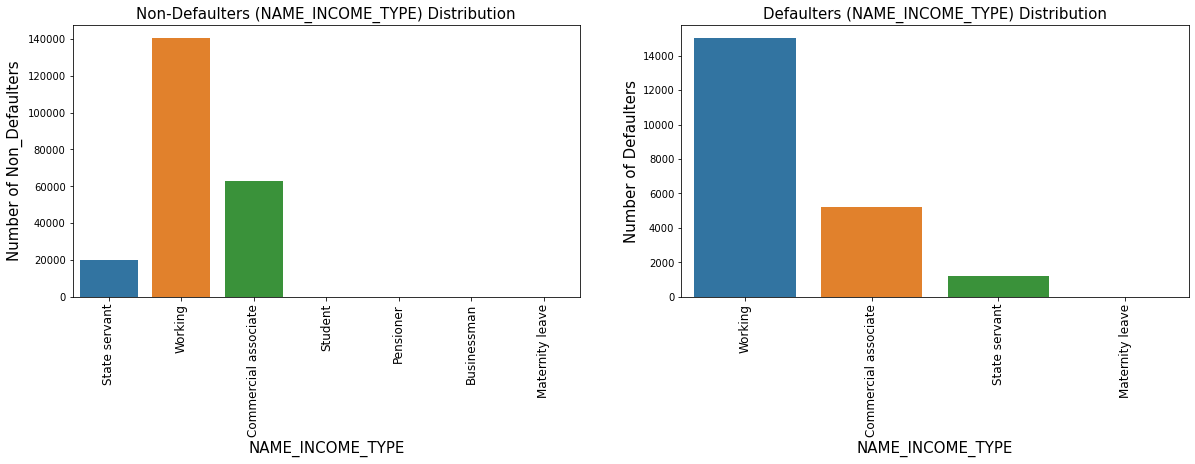

In [78]:
plot_cate('NAME_INCOME_TYPE',90) 

* Observations from the above plot:
 * Working Clients are equally likely to Default as well as Not Default, this may be due to the larger chunk of data for the 'Working', "INCOME_TYPE".
 * 'Pensioners', 'Commercial associate' and 'State servant" clients are less likely to default.
 * There is negligible data for other categories compared to the top 4 categories for 'INCOME_TYPE'.

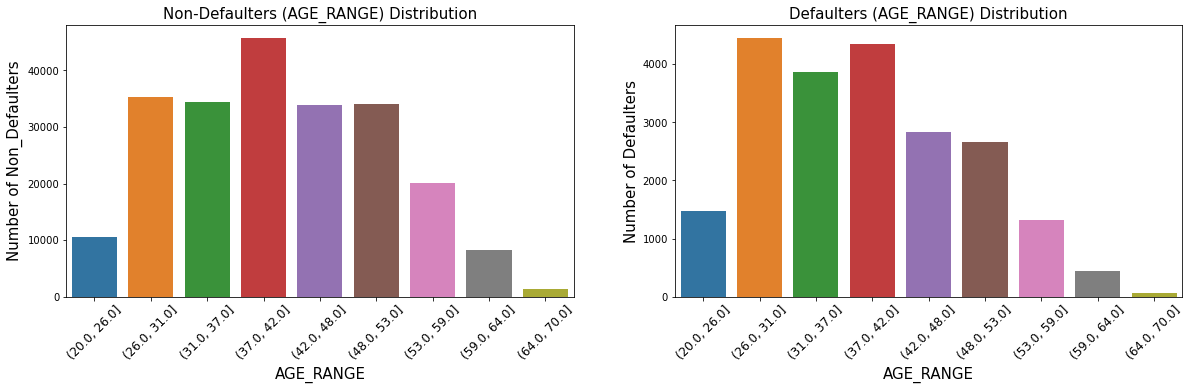

In [79]:
plot_cate('AGE_RANGE',45)

* Observations from the above plot:
 * Clients between 26 - 37 years are most likely to Default
 * The chances of Default start declining from age 42 onwards. 

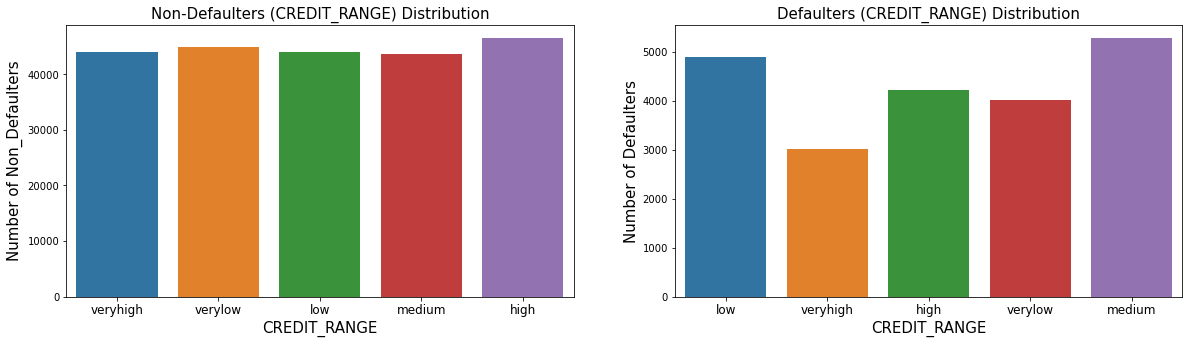

In [80]:
plot_cate('CREDIT_RANGE',0)

* Observations from the above plot:
 * Very high value loans are less likely to be defaulted, this may be beacuse such loans are availed by High Networth Individuals.
 * Very low value loans are also less likely to be defaulted as the lower value makes it easier for the client to repay. 

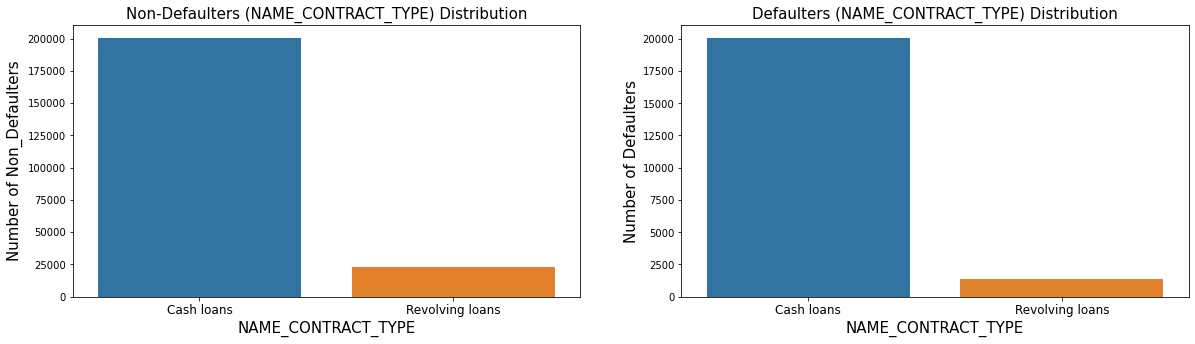

In [81]:
plot_cate('NAME_CONTRACT_TYPE',0)

* Observations from the above plot:
 * As we can see number of Defaults (0) on Revolving loans is lesser for the Defaulters category. 
 * In a Revolving loan the borrower has the flexibility to draw down or withdraw, repay, and withdraw again.
 * We can infer that this inherent flexibility allows clients to pay on time while simultaneously being safer for the bank
  ---------
 * The Graphs for Cash loans are almost equal in both Defaults and Non-Defaults category,suggesting it is the most popular loan type for the bank, but not allowing us anymore useful insight

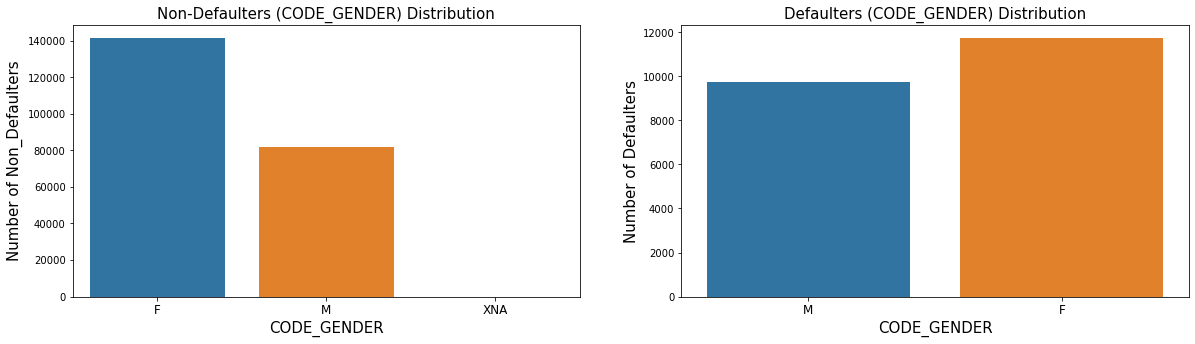

In [82]:
plot_cate('CODE_GENDER',0)

* Observations from the above plot:
 * The Female column is the Tallest in both graphs (Default and Non-Default)
 * This is due to the higher proportion of Female clients(65.82%) data in this dataset.
 * We cannot infer much from this plot.

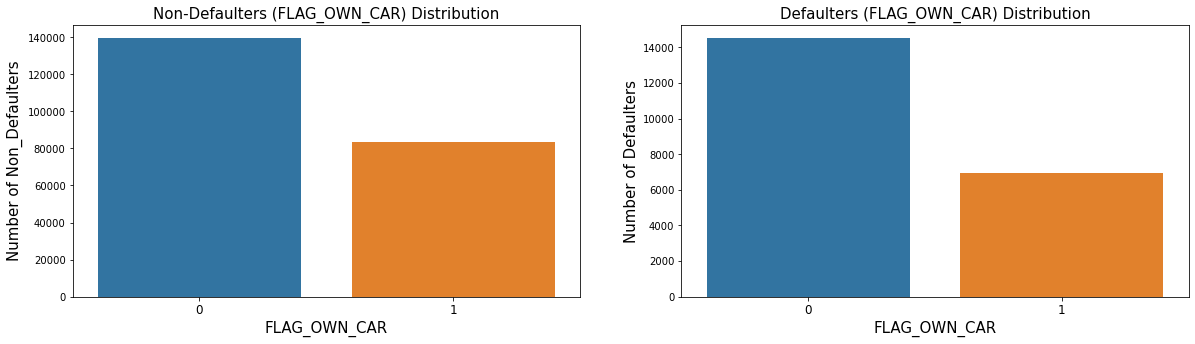

In [83]:
plot_cate('FLAG_OWN_CAR',0)

* Observations from the above plot:
 * The car ownership proportion in the Non-Defaulters graph is higher than the Defaulters graph
  * If our assumption is correct {1:'OWNS_CAR', 0: 'NO_CAR'}:
   * Car Owners are less likely to Default
   * Not much can be said about the Non Owners as they are almost similarly proportioned.
  

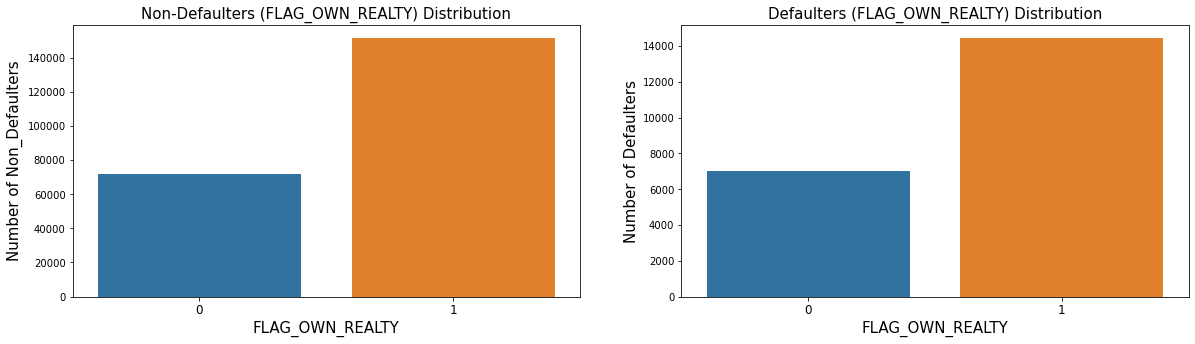

In [84]:
plot_cate('FLAG_OWN_REALTY',0)

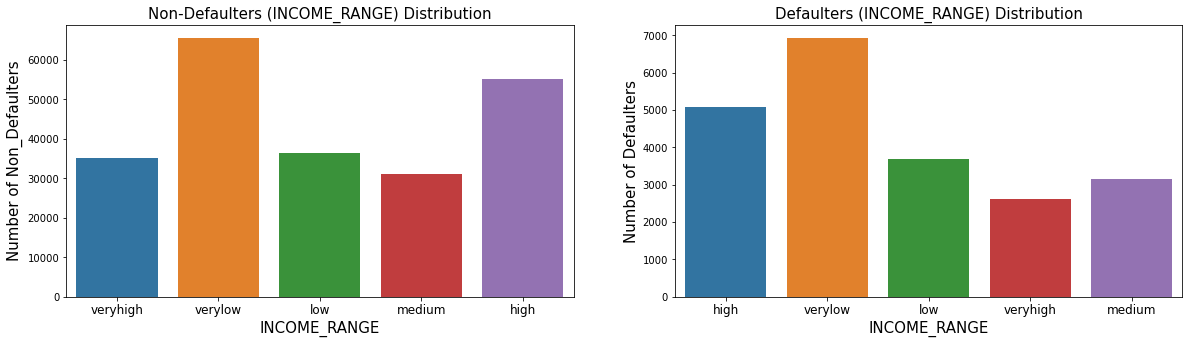

In [85]:
plot_cate('INCOME_RANGE',0)

* Observations from the above plot:
 * Plots for both are similar not much can be inferred

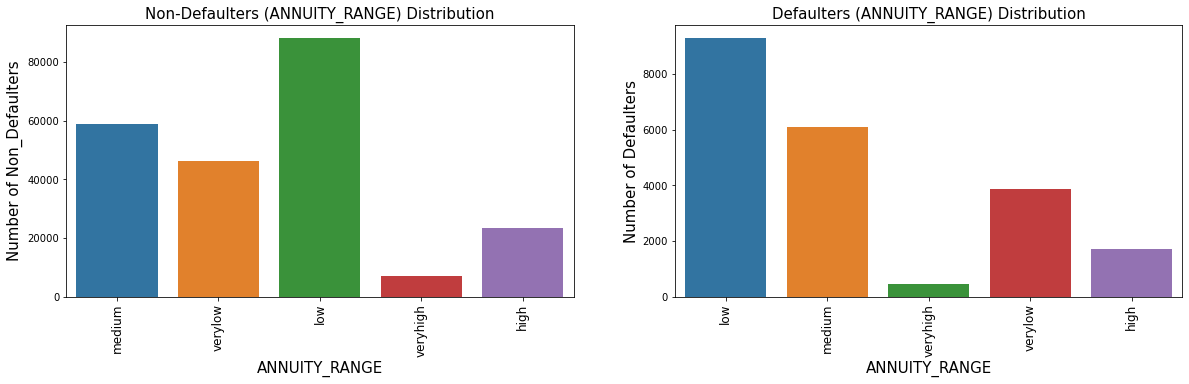

In [86]:
plot_cate('ANNUITY_RANGE',90)

* Observations from the above plot:
 * 'high' Annuity Range have a slightly lower Defaults

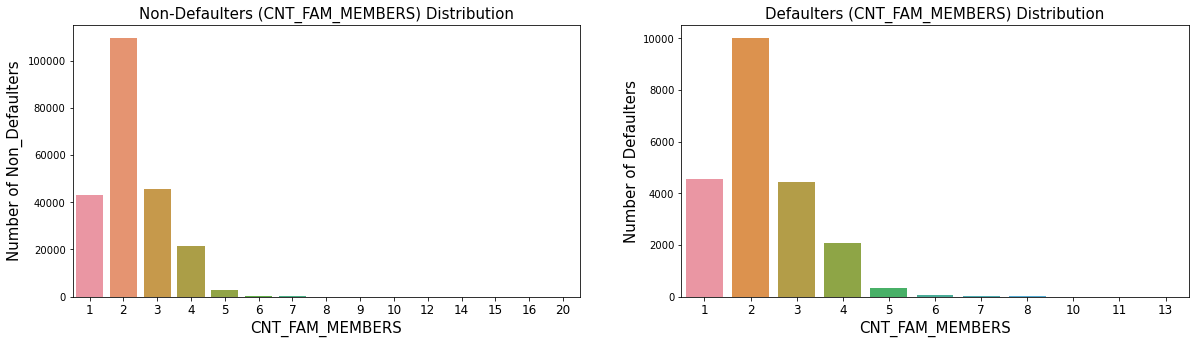

In [87]:
plot_cate('CNT_FAM_MEMBERS',0)

* Observations from the above plot:
 * Plots for both are very similar, but the number of Family members for Defaulters is slightly larger than the Non-Defaulters

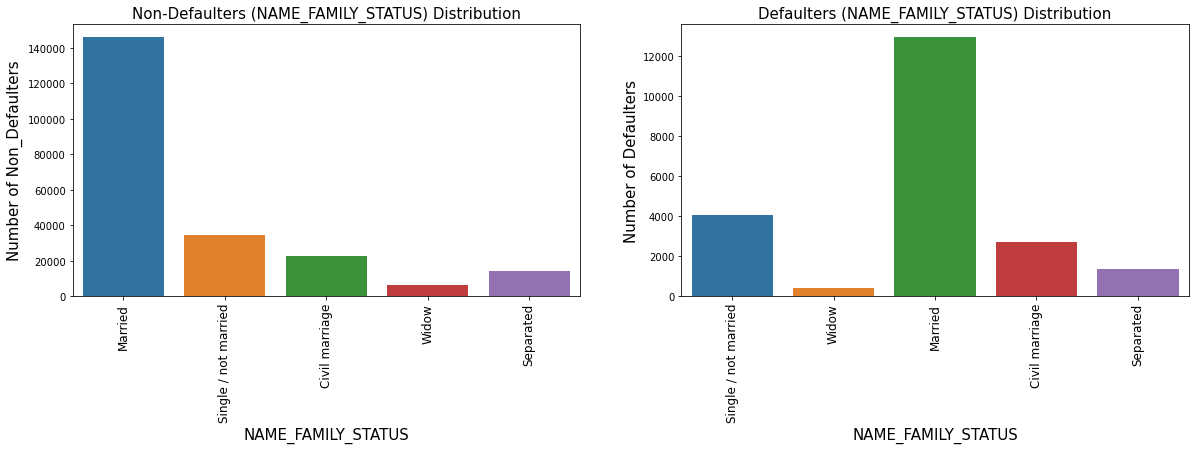

In [88]:
plot_cate('NAME_FAMILY_STATUS',90)

* Observations from the above plot:
 * Single / not Married clients are a bit more likely to delay/Default
 * Widow is less likely to delay/default

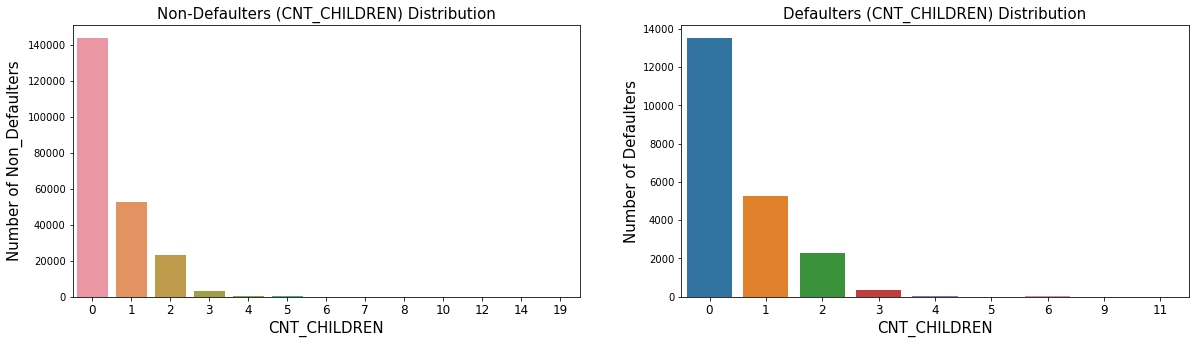

In [89]:
plot_cate('CNT_CHILDREN',0)

### 5.2 Finding correlations among the columns

#### 5.2.1 Finding the top 10 correlations in the 'TARGET' ( Non-Defaulters) attribute

In [90]:
# Creating a seperate dataframe for Non-Defaulters of dtype : numbers (int,float) as correlations can only be with numbers,
# and finding the top 10 Correlations.

ad_numbers_0 = ad_T_0.select_dtypes('number')

# Correlations of Non-Defaulters
ad_numbers_0_corr = round(ad_numbers_0.corr(),3)

# Finding the top 10 Correlation for Non-Defaulters
corr_pairs_0 = ad_numbers_0_corr.unstack()
corr_pairs_0_10 = corr_pairs_0.sort_values(ascending = False).drop_duplicates().head(10)
corr_pairs_0_10

FLAG_DOCUMENT_TOTAL          FLAG_DOCUMENT_TOTAL         1.000
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE    0.998
AMT_GOODS_PRICE              AMT_CREDIT                  0.986
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT        0.949
CNT_FAM_MEMBERS              CNT_CHILDREN                0.893
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE    0.862
AMT_CREDIT                   AMT_ANNUITY                 0.780
AMT_ANNUITY                  AMT_GOODS_PRICE             0.778
AMT_INCOME_TOTAL             AMT_ANNUITY                 0.440
AMT_GOODS_PRICE              AMT_INCOME_TOTAL            0.375
dtype: float64

In [91]:
corr_10_list_0 = ad_numbers_0[['OBS_60_CNT_SOCIAL_CIRCLE',
                  'OBS_30_CNT_SOCIAL_CIRCLE',
                  'AMT_GOODS_PRICE',
                  'AMT_CREDIT',
                  'REGION_RATING_CLIENT_W_CITY',
                  'REGION_RATING_CLIENT',
                  'CNT_FAM_MEMBERS',
                  'CNT_CHILDREN',
                  'DEF_60_CNT_SOCIAL_CIRCLE',
                  'DEF_30_CNT_SOCIAL_CIRCLE',
                  'AMT_ANNUITY',
                  'AMT_INCOME_TOTAL']].corr()[:10]

In [92]:
corr_10_list_0.columns

Index(['OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'AMT_GOODS_PRICE', 'AMT_CREDIT', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY',
       'AMT_INCOME_TOTAL'],
      dtype='object')

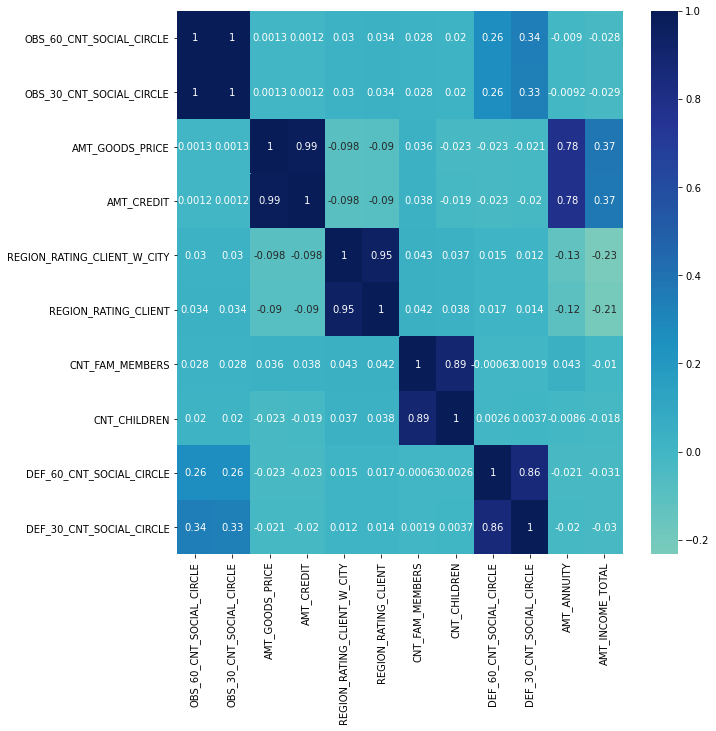

In [93]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_10_list_0,annot = True, center = 0, cmap="YlGnBu")
plt.show()

#### 5.2.2 Finding the top 10 correlations in the 'TARGET' ( Defaulters) attribute

In [94]:
# Creating a seperate dataframe for Defaulters of dtype : numbers (int,float) as correlations can only be with numbers,
# and finding the top 10 Correlations.
ad_numbers_1 = ad_T_1.select_dtypes('number')

# Correlations of Defaulters
ad_numbers_1_corr = round(ad_numbers_1.corr(),3)

# Finding the top 10 Correlation for Defaulters
corr_pairs_1 = ad_numbers_1_corr.unstack()
corr_pairs_1_10 = corr_pairs_1.sort_values(ascending = False).drop_duplicates().head(10)
corr_pairs_1_10

FLAG_DOCUMENT_TOTAL          FLAG_DOCUMENT_TOTAL         1.000
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE    0.998
AMT_GOODS_PRICE              AMT_CREDIT                  0.982
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT        0.957
CNT_FAM_MEMBERS              CNT_CHILDREN                0.893
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE    0.869
AMT_CREDIT                   AMT_ANNUITY                 0.752
AMT_ANNUITY                  AMT_GOODS_PRICE             0.750
AMT_INCOME_TOTAL             AMT_ANNUITY                 0.408
AMT_GOODS_PRICE              AMT_INCOME_TOTAL            0.343
dtype: float64

In [124]:
corr_10_list_1 = ad_numbers_1[['OBS_60_CNT_SOCIAL_CIRCLE',
                  'OBS_30_CNT_SOCIAL_CIRCLE',
                  'AMT_GOODS_PRICE',
                  'AMT_CREDIT',
                  'REGION_RATING_CLIENT_W_CITY',
                  'REGION_RATING_CLIENT',
                  'CNT_FAM_MEMBERS',
                  'CNT_CHILDREN',
                  'DEF_60_CNT_SOCIAL_CIRCLE',
                  'DEF_30_CNT_SOCIAL_CIRCLE',
                  'AMT_ANNUITY',
                  'AMT_INCOME_TOTAL']].corr()[:10]

In [125]:
corr_10_list_1.columns

Index(['OBS_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'AMT_GOODS_PRICE', 'AMT_CREDIT', 'REGION_RATING_CLIENT_W_CITY',
       'REGION_RATING_CLIENT', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_ANNUITY',
       'AMT_INCOME_TOTAL'],
      dtype='object')

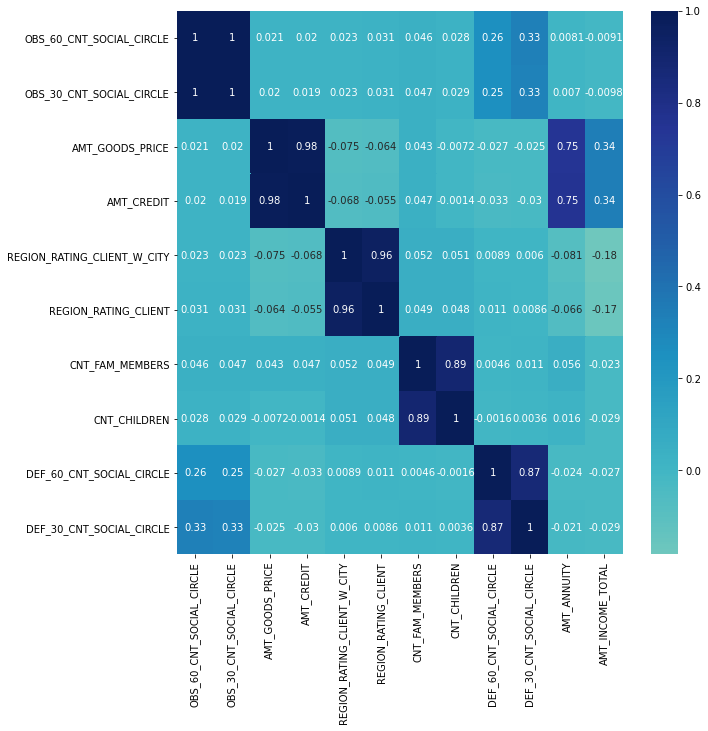

In [126]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_10_list_1,annot = True, center = 0, cmap="YlGnBu")
plt.show()

#### We can see almost all the fields are common in the Correlation matrix for both Categories

### 5.3 Univariate Analysis with 'TARGET' [ 1 , 0 ] for Continous Variables

In [95]:
# We will create a function to draw plots and pass in parameters ('column name' and 'xticks rotation') to compare against.
# This will help with Code reuse.

def plot_cont(var,r):
    plt.figure(figsize = (20,5))
    
    plt.subplot(1,2,1)
    ad_T_0[var].plot.hist()
    plt.title('Non-Defaulters ({}) Distribution'.format(var), fontsize = 15)
    plt.xlabel(var, fontsize = 15)
    plt.xticks(rotation = r,fontsize = 12)
    #plt.ylabel('Number of Non_Defaulters', fontsize = 15)
    
    plt.subplot(1,2,2)
    ad_T_1[var].plot.hist()
    plt.title('Defaulters ({}) Distribution'.format(var), fontsize = 15)
    plt.xlabel(var, fontsize = 15)
    plt.xticks(rotation = r,fontsize = 12)
    #plt.ylabel('Number of Defaulters', fontsize = 15)
    
    plt.show()

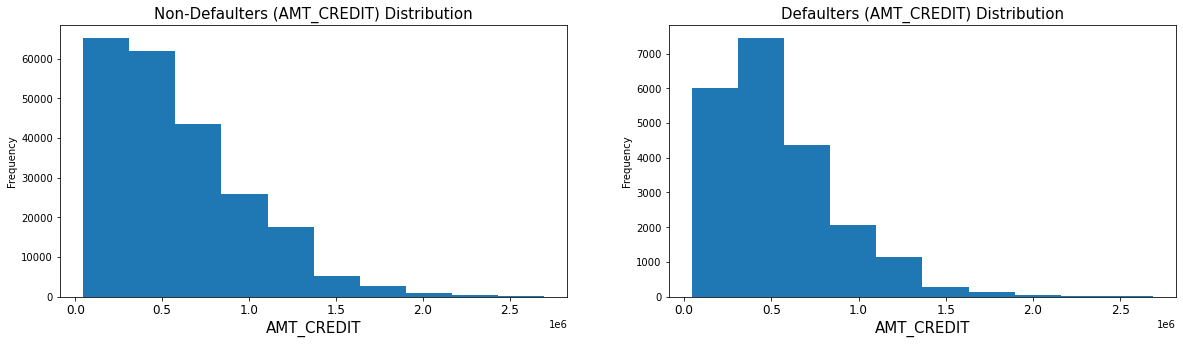

In [96]:
plot_cont('AMT_CREDIT',0)

* Observations from the above plot:
 * AMT_CREDIT Defaults is highest for the [ 500,000 - 1,000,000 ] range. 

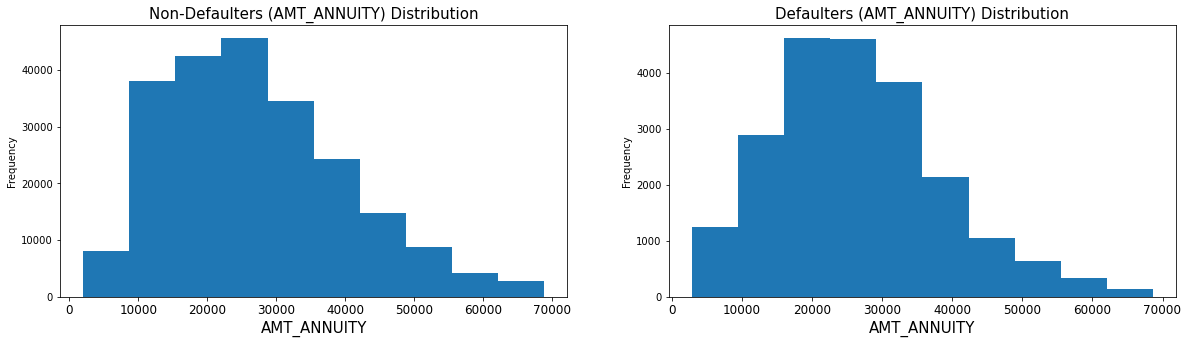

In [97]:
plot_cont('AMT_ANNUITY',0)

* Observations from the above plot:
 * AMT_ANNUITY seems like its relatively lower for Defaulters, as we can see It peaks for the range[ 0 - 25,000].
 * But for Non-Defaulters it peaks from [20,000 - 30,000].

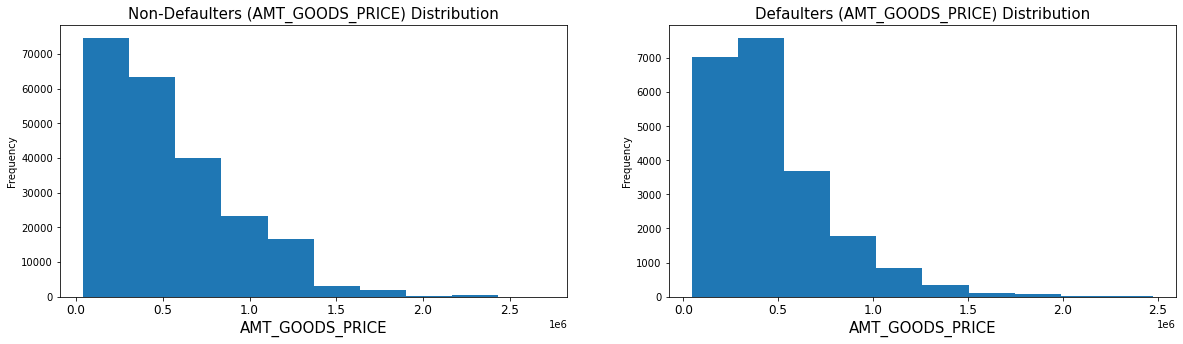

In [98]:
plot_cont('AMT_GOODS_PRICE',0)

* Observations from the above plot:
 * AMT_GOODS_PRICE for Defaulters peaks for the range[ 0 - 500,000 ].
 * But for Defaulters it peaks from [20,000 - 30,000].

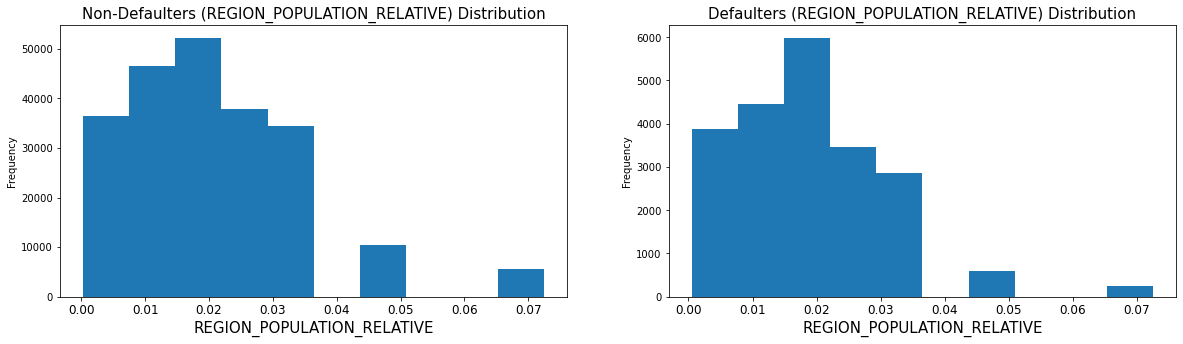

In [99]:
plot_cont('REGION_POPULATION_RELATIVE',0)

* Observations from the above plot:
 * REGION_POPULATION_RELATIVE (Normalized population of region where client lives (higher number means the client lives in more populated region)
 * From this it looks like as the clients living in densely populated areas are less likely to Default.

### 5.4 Bivariate Analysis with 'TARGET' [ 1 , 0 ] for Numeric Variables

In [100]:
def plot_bivar(xvar,yvar):

    plt.figure(figsize = (20,5))

    plt.subplot(1,2,1)
    sns.scatterplot(x = xvar, y = yvar, data = ad_T_0)
    plt.title('INCOME vs CREDIT for Non-Defaulters')

    plt.subplot(1,2,2)
    sns.scatterplot(x = xvar, y = yvar, data = ad_T_1)
    plt.title('INCOME vs CREDIT for Defaulters')
    plt.show()

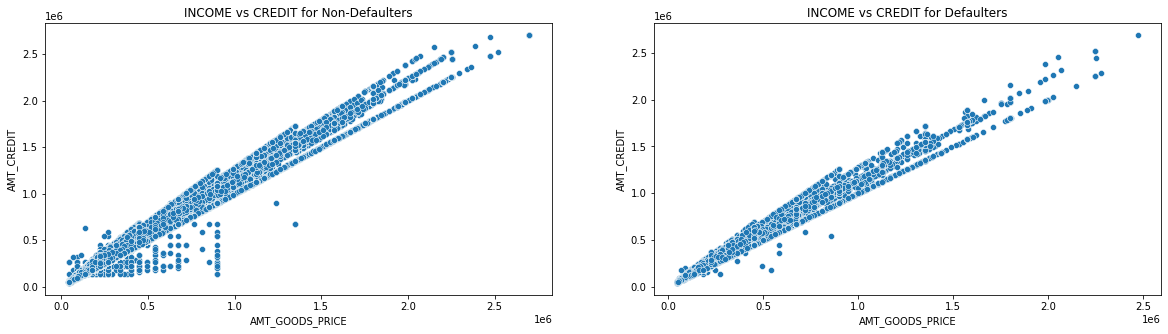

In [101]:
plot_bivar('AMT_GOODS_PRICE','AMT_CREDIT')

* Observations from the above plot:
 * Defaults are relatively less for the values less than 500,000 for 'AMT_CREDIT' and 1,000,000 for 'AMT_GOODS_PRICE'

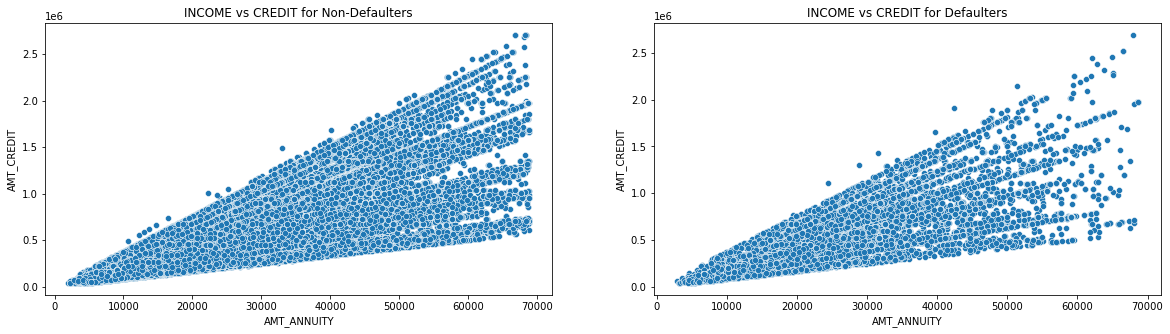

In [102]:
plot_bivar('AMT_ANNUITY','AMT_CREDIT')

* Observations from the above plot:
 * Not much can be said about 'AMT_CREDIT' vs 'AMT_ANNUITY'

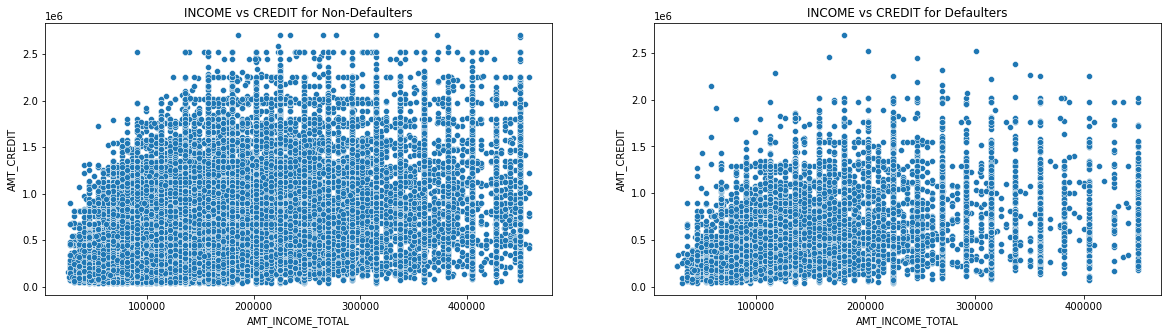

In [103]:
plot_bivar('AMT_INCOME_TOTAL','AMT_CREDIT')

* Observations from the above plot:
 * As we can see above, Defaulters are primarily concentrated in the lower proportion of 'AMT_CREDIT' vs 'AMT_INCOME_RANGE'

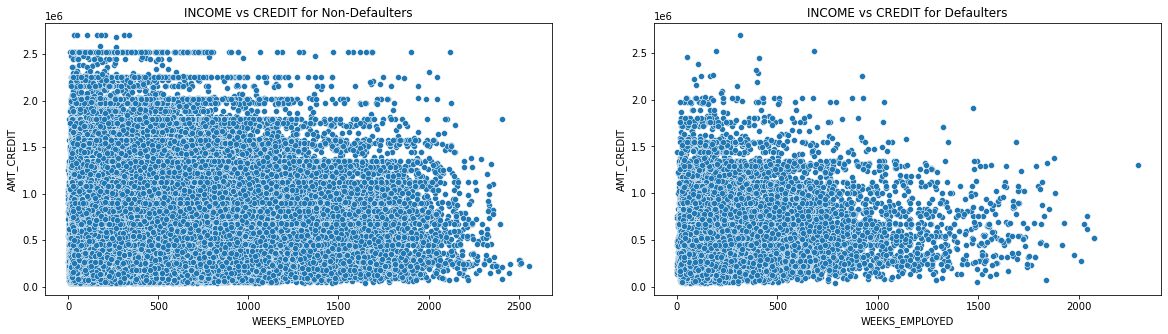

In [104]:
plot_bivar('WEEKS_EMPLOYED','AMT_CREDIT')

* Observations from the above plot:
 * As we can see above, Defaulters are primarily concentrated in the lower proportion of 'AMT_CREDIT' vs 'WEEKS_EMPLOYED'
 * This suggests that Defaults are more likely if 'WEEKS_EMPLOYMENT' is low.

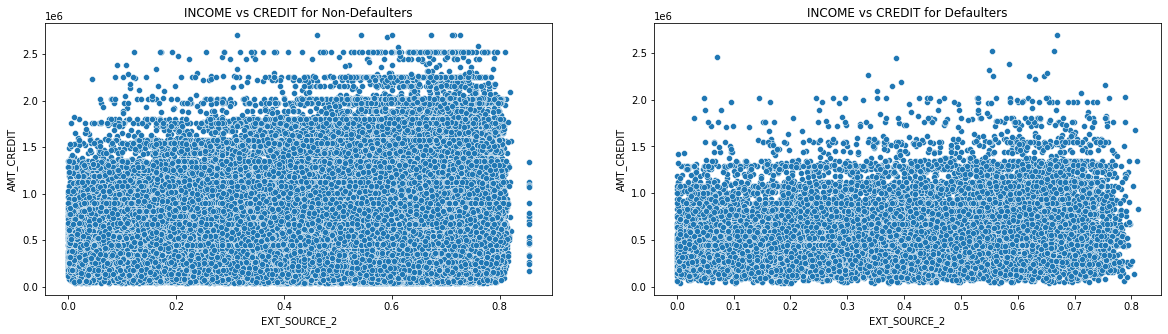

In [105]:
plot_bivar('EXT_SOURCE_2','AMT_CREDIT')

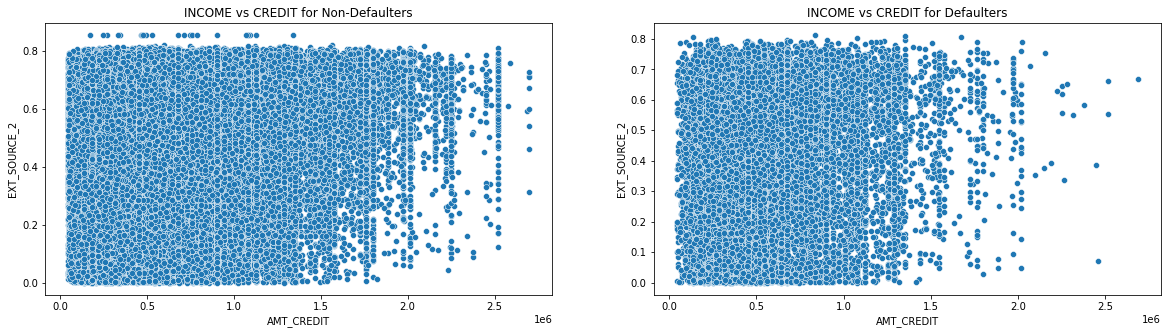

In [106]:
plot_bivar('AMT_CREDIT','EXT_SOURCE_2'
          )

* Observations from the above plot:
 * above 1,250,000 are less likely to be Defaulted

## 6. Importing and Merging the 'previous_application.csv' dataset

### 6.1 Importing "previous_application.csv"  into a Dataset 'PA'and taking a look at the statistical summary 

In [107]:
PA = pd.read_csv('previous_application.csv')
PA.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
PA.shape

(1670214, 37)

In [109]:
PA.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [110]:
PA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [111]:
PA.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [112]:
# Checking for nulls

PA.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

#### 6.1.1 Removing nulls above the '40%' threshold

In [113]:
# Removing nulls above the threshold (40%)
PA = PA.loc[:,PA.isnull().mean() <= 0.4]
print(PA.shape)
PA.isnull().mean()*100

(1670214, 26)


SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

* As the Previous Application dataset is huge with "1670214 rows" compared to the our trimmed Application Dataset with "305545 rows".
* We will be using about same number of rows for the Previous Application dataset as of Application Dataset for our Analysis

#### 6.1.2 Keeping only a portion of the total dataset, the dataset is huge and even the amount of data we will consider in the analysis will be sufficient for our use case.

In [114]:
# Trimming the "previous application" dataset to a more managable size.
PA = PA.loc[:305544]
PA.shape

(305545, 26)

### 6.2 Merging the Dataset 'previous_application' with 'application_data' to gather any further insights

In [115]:
# Merging the two datasets 'application data' and 'previous application' on 'SK_ID_CURR', as it is unique and common for both
A_P_merged = pd.merge(ad,PA, how = 'left', on = ['SK_ID_CURR'])
A_P_merged

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,WEEKS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_DOCUMENT_TOTAL,INCOME_RANGE,CREDIT_RANGE,ANNUITY_RANGE,GOODS_RANGE,EXT_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,26,91,3648,2120,1,1,0,1,1,0,Laborers,1,2,2,Business Entity Type 3,0.262949,2,2,2,2,1134.0,0.0,0.0,0.0,0.0,0.0,1.0,1,high,low,low,verylow,low,"(26.0, 31.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,46,170,1186,291,1,1,0,1,1,0,Core staff,2,1,1,School,0.622246,1,0,1,0,828.0,0.0,0.0,0.0,0.0,0.0,0.0,1,veryhigh,veryhigh,medium,medium,high,"(42.0, 48.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,53,33,4260,2531,1,1,1,1,1,0,Laborers,1,2,2,Government,0.555912,0,0,0,0,815.0,0.0,0.0,0.0,0.0,0.0,0.0,0,verylow,verylow,verylow,verylow,high,"(48.0, 53.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,53,435,9833,2437,1,1,0,1,0,0,Laborers,2,2,2,Business Entity Type 3,0.650442,2,0,2,0,617.0,0.0,0.0,0.0,0.0,0.0,1.0,1,low,low,medium,verylow,high,"(48.0, 53.0]",2078043.0,Cash loans,24246.000,675000.0,675000.0,675000.0,THURSDAY,15.0,Y,1.0,XNA,Approved,-181.0,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,48.0,low_normal,Cash X-Sell: low
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,55,434,4311,3458,1,1,0,1,0,0,Core staff,1,2,2,Religion,0.322738,0,0,0,0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1,low,medium,low,verylow,low,"(53.0, 59.0]",2001242.0,Cash loans,16509.600,180000.0,180000.0,180000.0,SUNDAY,14.0,Y,1.0,XNA,Approved,-865.0,Cash through the bank,XAP,Repeater,XNA,Cash,walk-in,Regional / Local,1200.0,Consumer electronics,18.0,high,Cash Street: high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326161,456248,0,Cash loans,F,0,1,0,153000.0,331920.0,16096.5,225000.0,Working,Secondary / secondary special,Separated,H

* We can ignore the NaN values as they are not taken into account during plotting.

#### 6.2.1 Plotting 'NAME_CONTRACT_STATUS' for the Merged dataset.

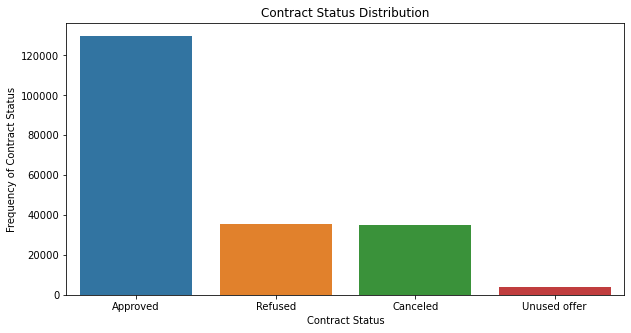

In [116]:
plt.figure(figsize = (10,5))
sns.countplot(A_P_merged.NAME_CONTRACT_STATUS)
plt.xlabel('Contract Status')
plt.ylabel('Frequency of Contract Status')
plt.title('Contract Status Distribution')
plt.show()

* Creating 4 different dataframes for each Contract status will help us analyse the 'TARGET' variable for each.

In [117]:
# Checking the 'CONTRACT_STATUS' proportions
A_P_merged.NAME_CONTRACT_STATUS.value_counts(normalize = True)*100

Approved        63.621389
Refused         17.454458
Canceled        17.037277
Unused offer     1.886876
Name: NAME_CONTRACT_STATUS, dtype: float64

In [118]:
# Creating dataframes for each Contract Status type
approved = A_P_merged[A_P_merged.NAME_CONTRACT_STATUS == 'Approved']
refused = A_P_merged[A_P_merged.NAME_CONTRACT_STATUS == 'Refused']
canceled = A_P_merged[A_P_merged.NAME_CONTRACT_STATUS == 'Canceled']
unused_offer = A_P_merged[A_P_merged.NAME_CONTRACT_STATUS == 'Unused offer']

In [119]:
# Creating a function to plot, this helps with code reuse
def plot_merged(var):

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize = (25,5))

    s1 = sns.countplot(ax = ax1, x = approved[var], data = approved)
    ax1.set_title('Approved', fontsize = 12)
    ax1.set_xlabel('%s'%var)
    ax1.set_ylabel('Frequency of Loans')
    s1.set_xticklabels(s1.get_xticklabels())
    
    s2 = sns.countplot(ax = ax2, x = refused[var], data = refused)
    ax2.set_title('Refused', fontsize = 12)
    ax2.set_xlabel('%s'%var)
    ax2.set_ylabel('Frequency of Loans')
    s2.set_xticklabels(s2.get_xticklabels())
    
    s3 = sns.countplot(ax = ax3, x = canceled[var], data = canceled)
    ax3.set_title('Canceled', fontsize = 12)
    ax3.set_xlabel('%s'%var)
    ax3.set_ylabel('Frequency of Loans')
    s3.set_xticklabels(s3.get_xticklabels())
    
    s4 = sns.countplot(ax = ax4, x = unused_offer[var], data = unused_offer)
    ax4.set_title('Unused_offer', fontsize = 12)
    ax4.set_xlabel('%s'%var)
    ax4.set_ylabel('Frequency of Loans')
    s4.set_xticklabels(s4.get_xticklabels())
    
    plt.show()

#### 6.2.1 Plotting 'TARGET' for each 'NAME_CONTRACT_STATUS' attribute

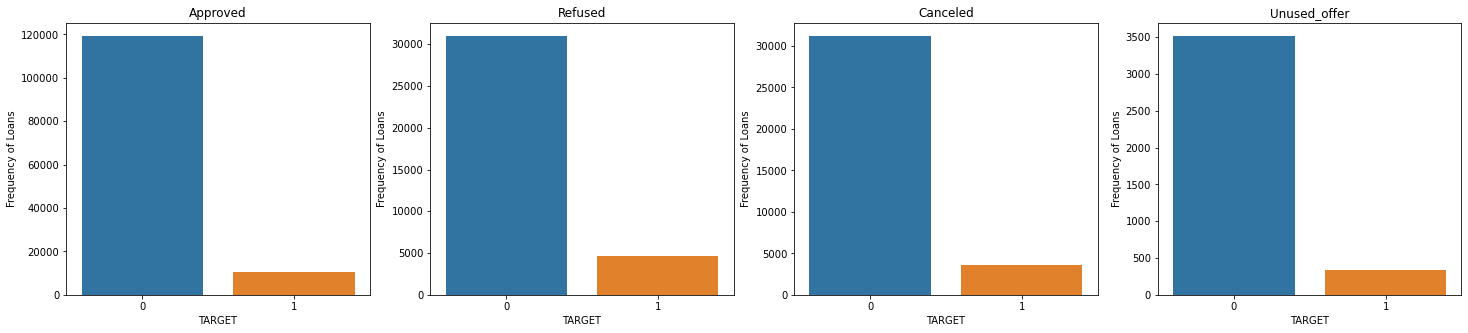

In [120]:
plot_merged('TARGET')

In [121]:
# Checking numeric propotions to get a clearer idea 
print('Approved:\n',approved.TARGET.value_counts(normalize = True)*100)
print('Refused:\n',refused.TARGET.value_counts(normalize = True)*100)
print('Canceled:\n',canceled.TARGET.value_counts(normalize = True)*100)
print('Unused Offer:\n',unused_offer.TARGET.value_counts(normalize = True)*100)

Approved:
 0    91.94483
1     8.05517
Name: TARGET, dtype: float64
Refused:
 0    87.043955
1    12.956045
Name: TARGET, dtype: float64
Canceled:
 0    89.747943
1    10.252057
Name: TARGET, dtype: float64
Unused Offer:
 0    91.374383
1     8.625617
Name: TARGET, dtype: float64


* As we can see above chances of Default are higher for 'Refused' and 'Cancelled' categories inline with our intution

#### 6.2.1 Plotting 'AMT_APPLICATION' vs 'AMT_INCOME_TOTAL' attributes for the 'NAME_CONTRACT_STATUS' attribute

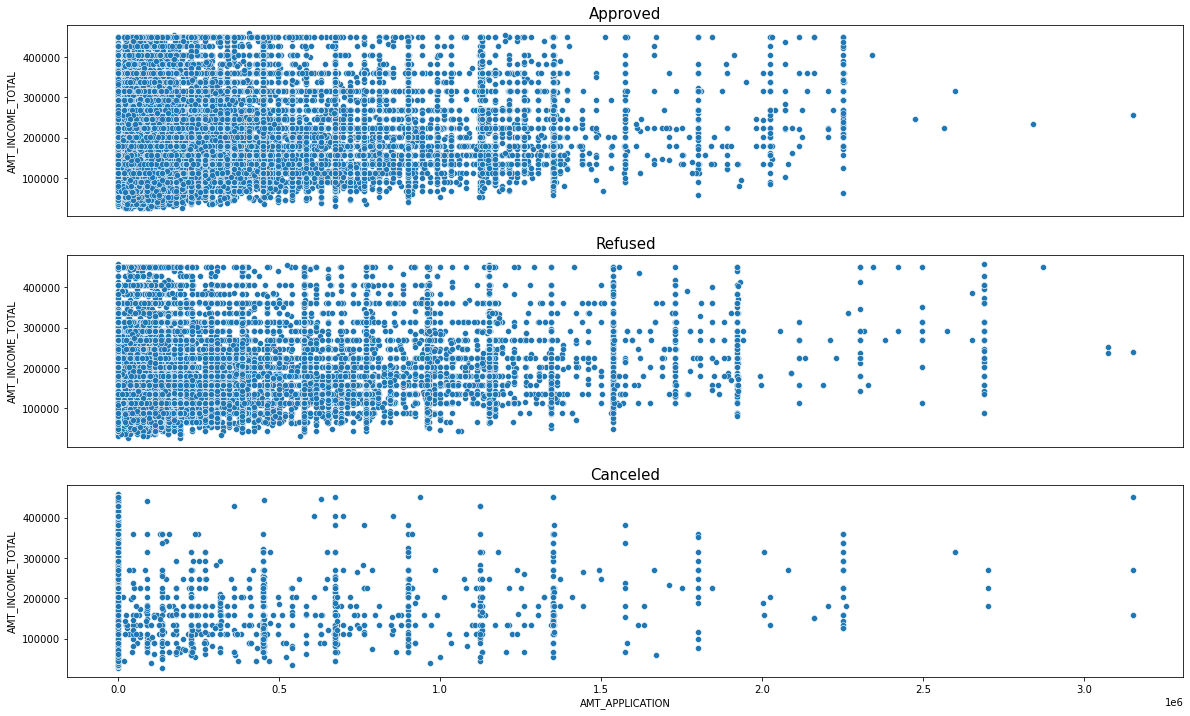

In [122]:
plt.figure(figsize=(20,12))

plt.subplot(311)
s1 = sns.scatterplot(x = 'AMT_APPLICATION', y = 'AMT_INCOME_TOTAL', data = approved)
s1.axes.xaxis.set_visible(False)
plt.title('Approved', fontdict={'size' : 15})

plt.subplot(312)
s2 = sns.scatterplot(x = 'AMT_APPLICATION', y = 'AMT_INCOME_TOTAL', data = refused)
plt.title('Refused', fontdict={'size' : 15})
s2.axes.xaxis.set_visible(False)

plt.subplot(313)
sns.scatterplot(x = 'AMT_APPLICATION', y = 'AMT_INCOME_TOTAL', data = canceled)
plt.title('Canceled', fontdict={'size' : 15})

plt.show()

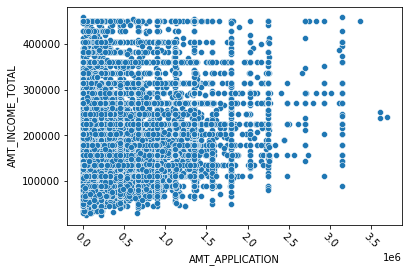

In [123]:
s2 = sns.scatterplot(x = 'AMT_APPLICATION',y = 'AMT_INCOME_TOTAL', data = refused)
plt.xticks(rotation = -45)
plt.show()    

* Observations from the above:
 * Loan applications('AMT_APPLICATION') above 2,250,000 have a higher likelyhood of being rejected.
 * Comparatively fewer loans('AMT_APPLICATION') were applied above the amount 1,500,000 overall, as we see a drop in all the above charts just before the value
 * As the 'AMT_INCOME_TOTAL' rises above 200,000 'AMT_APPLICATION' with value over 500,000 starts dropping.
 * The bulk of cancelled applications have a 'AMT_INCOME_TOTAL' value less than 200,000.  

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX